In [89]:
import pandas as pd
from odf.opendocument import load
from odf.table import Table, TableRow, TableCell
from odf.text import P

ss

# 2016 Data

Preliminary finding: Kostenstellen sind teilweise nicht vorhanden (bspw. gemäss Kostenstellen Übersicht ist Kultur = 291 nach HRM1 und 2300 nach HRM2). Im File ist die Kultur-Kostenstelle 201.

In [90]:
def read_ods(filename, sheet_no=0):
    """
    Read a sheet from an ODS file and return a Pandas DataFrame with headers.

    :param filename: Path to the ODS file.
    :param sheet_no: Sheet number to read (starting from 0).
    :return: Pandas DataFrame containing the data from the sheet.
    """
    doc = load(filename)
    sheet = doc.spreadsheet.getElementsByType(Table)[sheet_no]
    data = []
    for row in sheet.getElementsByType(TableRow):
        row_data = []
        for cell in row.getElementsByType(TableCell):
            cell_content = ''
            for p in cell.getElementsByType(P):
                if p.firstChild:
                    cell_content += p.firstChild.data
            row_data.append(cell_content)
        data.append(row_data)

    # Convert to DataFrame, assuming first row is the header
    df = pd.DataFrame(data)
    header = df.iloc[0]
    df = df[1:]
    df.columns = header
    return df

# Replace 'your_file.ods' with the path to your ODS file
ods_file = '2016_Laufende Rechnung 3-stellig.ods'

# Read the first sheet from the ODS file
df_2016 = read_ods(ods_file)

# Print the head of the DataFrame
df_2016.head()


,Typ,Rechnung 2015,Voranschlag 2016,Voranschlag,Konto,,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung von Budget u. Nachtr.,
1,F,,,,T,Laufende Rechnung Stadt St. Gallen,,,,None
2,F,660’847’764.66,657’169’675,,Aufwand,662’011’534.12,,-12’139’841,,None
3,F,,3’419’500,S,,,,,None,None
4,F,,13’562’200,P,,,,,None,None
5,F,666’354’012.13,650’851’525,,Ertrag,,667’790’892.41,16’939’367,,None


In [91]:
numeric_column_type = df_2016['Konto'].dtype
print(f"Data type of 'Konto': {numeric_column_type}")


Data type of 'Konto': object


Convert dtype from "object" to "float64"

In [92]:
# Convert 'Konto' column to float64
df_2016['Konto'] = pd.to_numeric(df_2016['Konto'], errors='coerce')

In [93]:
numeric_column_type = df_2016['Konto'].dtype
print(f"Data type of 'Konto': {numeric_column_type}")


Data type of 'Konto': float64


In the following section, I reorder the kst scheme

In [94]:
# Fill empty cells in 'Konto' with the value from the previous row
df_2016['Konto'] = df_2016['Konto'].ffill()

# Display the updated DataFrame
df_2016

,Typ,Rechnung 2015,Voranschlag 2016,Voranschlag,Konto,,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung von Budget u. Nachtr.,
1,F,,,,NaN,Laufende Rechnung Stadt St. Gallen,,,,None
2,F,660’847’764.66,657’169’675,,NaN,662’011’534.12,,-12’139’841,,None
3,F,,3’419’500,S,NaN,,,,None,None
4,F,,13’562’200,P,NaN,,,,None,None
5,F,666’354’012.13,650’851’525,,NaN,,667’790’892.41,16’939’367,,None
...,...,...,...,...,...,...,...,...,...,...
2607,N,422’026.55,,,480.00,Entnahmen aus Spezialfinanzierungen und Stiftu...,,,,None
2608,N,825’379.25,1’555’200,,490.00,Intern verrechneter Ertrag,,1’598’857.80,43’658,
2609,N,18’399.90,10’800,,496.00,Intern verrechnete Zinsen,,16’350.90,5’551,
2610,,,,,496.00,,,None,None,None


In [95]:
# Initialize 'kst' column
df_2016['kst'] = None

# Track the last 'F' value in 'Konto'
last_f_value = None

# Iterate through DataFrame rows
for index, row in df_2016.iterrows():
    if row['Typ'] == 'F':
        last_f_value = row['Konto']
    df_2016.at[index, 'kst'] = last_f_value

# Print the updated DataFrame
df_2016

,Typ,Rechnung 2015,Voranschlag 2016,Voranschlag,Konto,,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung von Budget u. Nachtr.,,kst
1,F,,,,NaN,Laufende Rechnung Stadt St. Gallen,,,,None,NaN
2,F,660’847’764.66,657’169’675,,NaN,662’011’534.12,,-12’139’841,,None,NaN
3,F,,3’419’500,S,NaN,,,,None,None,NaN
4,F,,13’562’200,P,NaN,,,,None,None,NaN
5,F,666’354’012.13,650’851’525,,NaN,,667’790’892.41,16’939’367,,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2607,N,422’026.55,,,480.00,Entnahmen aus Spezialfinanzierungen und Stiftu...,,,,None,681.00
2608,N,825’379.25,1’555’200,,490.00,Intern verrechneter Ertrag,,1’598’857.80,43’658,,681.00
2609,N,18’399.90,10’800,,496.00,Intern verrechnete Zinsen,,16’350.90,5’551,,681.00
2610,,,,,496.00,,,None,None,None,681.00


Count 145 unique values of Typ "F"

In [96]:
# Count unique values in 'kst' column
unique_count = df_2016['kst'].nunique()

# Print the count
print(f"Number of unique values in 'kst': {unique_count}")

Number of unique values in 'kst': 145


To test, whether all rows now have the additional column, run the following

In [97]:
# # Number to check
# number_to_check = 10  # Replace with the number you're looking for

# # Check if the number is present in either 'kst_bisher' or 'kst_neu'
# result_df = df_2016[(df_2016['kst'] == number_to_check)]

# if not result_df.empty:
#     # If the number is found, display the rows
#     print(result_df)
# else:
#     # If the number is not found, print a message
#     print("this kst does not exist")

In [98]:
# # Number to check
# number_to_check = 10  # Replace with the number you're looking for

# # Check if the number is present in either 'kst_bisher' or 'kst_neu'
# result_df = df_2016[(df_2016['Konto'] == number_to_check)]

# if not result_df.empty:
#     # If the number is found, display the rows
#     print(result_df)
# else:
#     # If the number is not found, print a message
#     print("this kst does not exist")

In [99]:
# Group by the 'IsNumeric' column
grouped_df_2016 = df_2016.groupby('IsNumeric')

# Print only the group where 'Konto' values are numeric
numeric_group_df_2016 = grouped_df_2016.get_group(True)
print("Group with Numeric 'Konto' values:")
numeric_group_df_2016

KeyError: 'IsNumeric'

In [ ]:
# Create a new column 'IsNumeric' to categorize rows
df_2016['IsNumeric'] = df_2016['Konto'].apply(is_numeric)

# Group by the 'IsNumeric' column
grouped_df_2016 = df_2016.groupby('IsNumeric')

# Print only the group where 'Konto' values are numeric
numeric_group_df_2016 = grouped_df_2016.get_group(True)
print("Group with Numeric 'Konto' values:")
numeric_group_df_2016

Group with Numeric 'Konto' values:


,Typ,Rechnung 2015,Voranschlag 2016,Voranschlag,Konto,,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung von Budget u. Nachtr.,,kst,IsNumeric
1,F,,,,NaN,Laufende Rechnung Stadt St. Gallen,,,,None,NaN,True
2,F,660’847’764.66,657’169’675,,NaN,662’011’534.12,,-12’139’841,,None,NaN,True
3,F,,3’419’500,S,NaN,,,,None,None,NaN,True
4,F,,13’562’200,P,NaN,,,,None,None,NaN,True
5,F,666’354’012.13,650’851’525,,NaN,,667’790’892.41,16’939’367,,None,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2607,N,422’026.55,,,480.00,Entnahmen aus Spezialfinanzierungen und Stiftu...,,,,None,681.00,True
2608,N,825’379.25,1’555’200,,490.00,Intern verrechneter Ertrag,,1’598’857.80,43’658,,681.00,True
2609,N,18’399.90,10’800,,496.00,Intern verrechnete Zinsen,,16’350.90,5’551,,681.00,True
2610,,,,,496.00,,,None,None,None,681.00,True


In [ ]:
# Function to convert formatted string to float
def convert_to_float(s):
    if isinstance(s, str):
        return pd.to_numeric(s.replace("'", '').replace("’", ''), errors='coerce')
    return s

# Columns to convert
columns_to_convert = [
    'Rechnung 2015',
    'Voranschlag 2016',
    'Rechnung 2016 Aufwand',
    'Rechnung 2016 Ertrag',
    'Abweichung von Budget u. Nachtr.'
]

# Apply the function to the specified columns
for column in columns_to_convert:
    numeric_group_df_2016[column] = numeric_group_df_2016[column].apply(convert_to_float)

# Display the updated DataFrame
numeric_group_df_2016

,Typ,Rechnung 2015,Voranschlag 2016,Voranschlag,Konto,,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung von Budget u. Nachtr.,,kst,IsNumeric
1,F,NaN,NaN,,NaN,Laufende Rechnung Stadt St. Gallen,NaN,NaN,NaN,None,NaN,True
2,F,660'847'764.66,657'169'675.00,,NaN,662’011’534.12,NaN,-12'139'841.00,NaN,None,NaN,True
3,F,NaN,3'419'500.00,S,NaN,,NaN,NaN,NaN,None,NaN,True
4,F,NaN,13'562'200.00,P,NaN,,NaN,NaN,NaN,None,NaN,True
5,F,666'354'012.13,650'851'525.00,,NaN,,667'790'892.41,16'939'367.00,NaN,None,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2607,N,422'026.55,NaN,,480.00,Entnahmen aus Spezialfinanzierungen und Stiftu...,NaN,NaN,NaN,None,681.00,True
2608,N,825'379.25,1'555'200.00,,490.00,Intern verrechneter Ertrag,NaN,1'598'857.80,43'658.00,,681.00,True
2609,N,18'399.90,10'800.00,,496.00,Intern verrechnete Zinsen,NaN,16'350.90,5'551.00,,681.00,True
2610,,NaN,NaN,,496.00,,NaN,NaN,NaN,None,681.00,True


This transformation has some issue, as according to the excel - there should be a total of 1594 rows (check later)

In [103]:
# Drop rows where 'Abweichung von Budget u. Nachtr.' is NaN
df_2016_cleaned = numeric_group_df_2016.dropna(subset=['Abweichung von Budget u. Nachtr.'])

# Display the cleaned DataFrame
df_2016_cleaned

,Typ,Rechnung 2015,Voranschlag 2016,Voranschlag,Konto,,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung von Budget u. Nachtr.,,kst,IsNumeric
20,N,84'810.00,96'400.00,,300.00,Behörden und Kommissionen,107'689.95,NaN,-410.00,,10.00,True
22,N,163.25,NaN,,303.00,Sozialversicherungsbeiträge,810.85,NaN,811.00,,10.00,True
23,N,9.30,NaN,,305.00,Unfallversicherungs-/Krankentaggeldbeiträge,89.30,NaN,89.00,,10.00,True
24,N,89'637.95,164'000.00,,310.00,Büromaterial und Drucksachen,131'682.50,NaN,-32'318.00,,10.00,True
26,N,7'229.75,26'000.00,,317.00,Spesenentschädigungen,20'878.90,NaN,-5'121.00,,10.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2603,N,NaN,185'200.00,,380.00,Einlagen in Spezialfinanzierungen und Stiftungen,414'376.35,NaN,229'176.00,,681.00,True
2605,N,137'983.30,130'800.00,,396.00,Intern verrechnete Zinsen,131'962.60,NaN,1'163.00,,681.00,True
2606,N,692'545.75,785'000.00,,398.00,Intern verrechnete Abschreibungen,739'264.15,NaN,-45'736.00,,681.00,True
2608,N,825'379.25,1'555'200.00,,490.00,Intern verrechneter Ertrag,NaN,1'598'857.80,43'658.00,,681.00,True


The following displays that there are various rows per KST

In [ ]:
# #The following is a pure test, to see the entries for the KST 300
# filtered_df = df_2016_cleaned[df_2016_cleaned['Konto'] == "331"]
# filtered_df

,Typ,Rechnung 2015,Voranschlag 2016,Voranschlag,Konto,,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
505,N,36795732.18,42426000.0,,331,"Abschreibungen auf dem Verwaltungsvermögen, or...",37337464.16,NaN,-5088536.0,,True


Group by kst

In [104]:
# Drop specified columns
columns_to_drop = ['Typ', 'Voranschlag', 'Konto','', 'IsNumeric']
df_2016_cleaned = df_2016_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Group by 'Konto' and calculate the sum
grouped_df = df_2016_cleaned.groupby('kst').sum()

# Reset the index to default integer index
final_df_2016_reset = grouped_df.reset_index()

# Rename the column
final_df_2016_reset = final_df_2016_reset.rename(columns={'Abweichung von Budget u. Nachtr.': 'Abweichung 2016'})

# Display the grouped DataFrame with sums
final_df_2016_reset


,kst,Rechnung 2015,Voranschlag 2016,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung 2016
0,10.00,404'785.85,668'700.00,644'166.85,1'500.00,-34'733.00
1,11.00,309'751.55,282'600.00,306'895.60,0.00,-27'804.00
2,12.00,2'406'996.10,2'458'000.00,2'312'523.55,107'521.60,-65'354.00
3,15.00,119'728.12,121'250.00,120'067.47,0.00,-3'382.00
4,17.00,297'379.74,355'600.00,377'206.99,5'409.60,-13'884.00
...,...,...,...,...,...,...
109,645.00,205'221.25,239'400.00,76'341.60,627'676.30,464'617.00
110,660.00,2'130'870.02,2'175'500.00,1'155'523.55,1'027'920.00,7'942.00
111,661.00,1'409'021.90,1'418'800.00,1'093'607.80,382'270.80,57'079.00
112,680.00,2'234'849.04,2'129'300.00,2'093'591.80,151'224.15,39'516.00


Group by Konto

In [87]:
# # Drop specified columns
# columns_to_drop = ['Typ', 'Voranschlag', 'kst','', 'IsNumeric']
# df_2016_cleaned = df_2016_cleaned.drop(columns=columns_to_drop, errors='ignore')

# # Group by 'Konto' and calculate the sum
# grouped_df = df_2016_cleaned.groupby('Konto').sum()

# # Reset the index to default integer index
# final_df_2016_reset = grouped_df.reset_index()

# # Rename the column
# final_df_2016_reset = final_df_2016_reset.rename(columns={'Abweichung von Budget u. Nachtr.': 'Abweichung 2016'})

# # Display the grouped DataFrame with sums
# final_df_2016_reset


KeyError: 'Konto'

# 2017 Data

In [8]:
def read_ods(filename, sheet_no=0):
    """
    Read a sheet from an ODS file and return a Pandas DataFrame with headers.

    :param filename: Path to the ODS file.
    :param sheet_no: Sheet number to read (starting from 0).
    :return: Pandas DataFrame containing the data from the sheet.
    """
    doc = load(filename)
    sheet = doc.spreadsheet.getElementsByType(Table)[sheet_no]
    data = []
    for row in sheet.getElementsByType(TableRow):
        row_data = []
        for cell in row.getElementsByType(TableCell):
            cell_content = ''
            for p in cell.getElementsByType(P):
                if p.firstChild:
                    cell_content += p.firstChild.data
            row_data.append(cell_content)
        data.append(row_data)

    # Convert to DataFrame, assuming first row is the header
    df = pd.DataFrame(data)
    header = df.iloc[0]
    df = df[1:]
    df.columns = header
    return df

# Replace 'your_file.ods' with the path to your ODS file
ods_file = '2017_Laufende Rechnung 3-stellig.ods'

# Read the first sheet from the ODS file
df_2017 = read_ods(ods_file)

# Print the head of the DataFrame
df_2017.head()

,Typ,Rechnung 2016,Voranschlag 2017,Voranschlag,Konto,,Rechnung 2017 Aufwand,Rechnung 2017 Ertrag,Abweichung von Budget u. Nachtr.,
1,F,,,,T,Laufende Rechnung Stadt St. Gallen,,,,None
2,F,662’011’534.12,666’858’010,,Aufwand,671’297’401.71,,-4’887’508,,None
3,F,,2’661’500,S,,,,,None,None
4,F,,6’665’400,P,,,,,None,None
5,F,667’790’892.41,662’887’670,,Ertrag,,683’393’698.75,20’506’029,,None


In [9]:
# Function to check if a value is numerical
def is_numeric(val):
    if val is None or val == '':
        return False
    try:
        float(val)
        return True
    except ValueError:
        return False

# Create a new column 'IsNumeric' to categorize rows
df_2017['IsNumeric'] = df_2017['Konto'].apply(is_numeric)

# Group by the 'IsNumeric' column
grouped_df_2017 = df_2017.groupby('IsNumeric')

# Print only the group where 'Konto' values are numeric
numeric_group_df_2017 = grouped_df_2017.get_group(True)
print("Group with Numeric 'Konto' values:")
numeric_group_df_2017

Group with Numeric 'Konto' values:


,Typ,Rechnung 2016,Voranschlag 2017,Voranschlag,Konto,,Rechnung 2017 Aufwand,Rechnung 2017 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
9,F,,,,1,Bürgerschaft und Behörden,,,,None,True
15,F,,,,10,Gemeinde,,,,None,True
19,N,107’689.95,85’800,,300,Behörden und Kommissionen,93’589.30,,7’789,,True
20,N,810.85,200,,303,Sozialversicherungsbeiträge,335.80,,136,,True
21,N,89.30,,,305,Unfallversicherungs-/Krankentaggeldbeiträge,43.20,,43,,True
...,...,...,...,...,...,...,...,...,...,...,...
2811,N,80’000.00,80’000,,390,Intern verrechneter Aufwand,80’000.00,,,,True
2812,N,131’962.60,138’500,,396,Intern verrechnete Zinsen,128’408.20,,-10’092,,True
2813,N,739’264.15,875’000,,398,Intern verrechnete Abschreibungen,795’581.00,,-79’419,,True
2814,N,1’598’857.80,1’581’100,,490,Intern verrechneter Ertrag,,1’666’961.55,85’862,,True


In [10]:
# Function to convert formatted string to float
def convert_to_float(s):
    if isinstance(s, str):
        return pd.to_numeric(s.replace("'", '').replace("’", ''), errors='coerce')
    return s

# Columns to convert
columns_to_convert = [
    'Rechnung 2016',
    'Voranschlag 2017',
    'Rechnung 2017 Aufwand',
    'Rechnung 2017 Ertrag',
    'Abweichung von Budget u. Nachtr.'
]

# Apply the function to the specified columns
for column in columns_to_convert:
    numeric_group_df_2017[column] = numeric_group_df_2017[column].apply(convert_to_float)

# Display the updated DataFrame
numeric_group_df_2017

C:\Users\domin\AppData\Local\Temp\ipykernel_6348\118285850.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_group_df_2017[column] = numeric_group_df_2017[column].apply(convert_to_float)


,Typ,Rechnung 2016,Voranschlag 2017,Voranschlag,Konto,,Rechnung 2017 Aufwand,Rechnung 2017 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
9,F,NaN,NaN,,1,Bürgerschaft und Behörden,NaN,NaN,NaN,None,True
15,F,NaN,NaN,,10,Gemeinde,NaN,NaN,NaN,None,True
19,N,107689.95,85800.0,,300,Behörden und Kommissionen,93589.3,NaN,7789.0,,True
20,N,810.85,200.0,,303,Sozialversicherungsbeiträge,335.8,NaN,136.0,,True
21,N,89.30,NaN,,305,Unfallversicherungs-/Krankentaggeldbeiträge,43.2,NaN,43.0,,True
...,...,...,...,...,...,...,...,...,...,...,...
2811,N,80000.00,80000.0,,390,Intern verrechneter Aufwand,80000.0,NaN,NaN,,True
2812,N,131962.60,138500.0,,396,Intern verrechnete Zinsen,128408.2,NaN,-10092.0,,True
2813,N,739264.15,875000.0,,398,Intern verrechnete Abschreibungen,795581.0,NaN,-79419.0,,True
2814,N,1598857.80,1581100.0,,490,Intern verrechneter Ertrag,NaN,1666961.55,85862.0,,True


In [11]:
# Drop rows where 'Abweichung von Budget u. Nachtr.' is NaN
df_2017_cleaned = numeric_group_df_2017.dropna(subset=['Abweichung von Budget u. Nachtr.'])

# Display the cleaned DataFrame
df_2017_cleaned

,Typ,Rechnung 2016,Voranschlag 2017,Voranschlag,Konto,,Rechnung 2017 Aufwand,Rechnung 2017 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
19,N,107689.95,85800.0,,300,Behörden und Kommissionen,93589.30,NaN,7789.0,,True
20,N,810.85,200.0,,303,Sozialversicherungsbeiträge,335.80,NaN,136.0,,True
21,N,89.30,NaN,,305,Unfallversicherungs-/Krankentaggeldbeiträge,43.20,NaN,43.0,,True
22,N,131682.50,102600.0,,310,Büromaterial und Drucksachen,95065.40,NaN,-7535.0,,True
24,N,20878.90,1900.0,,317,Spesenentschädigungen,3764.90,NaN,1865.0,,True
...,...,...,...,...,...,...,...,...,...,...,...
2810,N,414376.35,173900.0,,380,Einlagen in Spezialfinanzierungen und Stiftungen,430974.75,NaN,257075.0,,True
2812,N,131962.60,138500.0,,396,Intern verrechnete Zinsen,128408.20,NaN,-10092.0,,True
2813,N,739264.15,875000.0,,398,Intern verrechnete Abschreibungen,795581.00,NaN,-79419.0,,True
2814,N,1598857.80,1581100.0,,490,Intern verrechneter Ertrag,NaN,1666961.55,85862.0,,True


In [12]:
# Drop specified columns
columns_to_drop = ['Typ', 'Voranschlag', '', 'IsNumeric']
df_2017_cleaned = df_2017_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Group by 'Konto' and calculate the sum
final_df_2017 = df_2017_cleaned.groupby('Konto').sum()

# Reset the index to default integer index
final_df_2017_reset = final_df_2017.reset_index()

# Rename the column
final_df_2017_reset = final_df_2017_reset.rename(columns={'Abweichung von Budget u. Nachtr.': 'Abweichung 2017'})

# Display the grouped DataFrame with sums
final_df_2017_reset


,Konto,Rechnung 2016,Voranschlag 2017,Rechnung 2017 Aufwand,Rechnung 2017 Ertrag,Abweichung 2017
0,300,1.772374e+06,1818310.0,1.753321e+06,0.00,-64990.0
1,301,1.176833e+08,138145800.0,1.364322e+08,0.00,-2585843.0
2,302,6.655322e+07,68693200.0,6.822566e+07,0.00,-1092546.0
3,303,1.377566e+07,15233700.0,1.532070e+07,0.00,87007.0
4,304,1.688704e+07,18116900.0,1.870970e+07,0.00,592799.0
...,...,...,...,...,...,...
86,494,0.000000e+00,530000.0,0.000000e+00,481995.20,-48005.0
87,495,2.270000e+03,2600.0,0.000000e+00,2080.00,-520.0
88,496,1.104375e+07,9996450.0,0.000000e+00,9975742.65,-20707.0
89,497,1.226428e+06,1365300.0,0.000000e+00,1214586.85,-150713.0


# 2018 Data

In [13]:
def read_ods(filename, sheet_no=0):
    """
    Read a sheet from an ODS file and return a Pandas DataFrame with headers.

    :param filename: Path to the ODS file.
    :param sheet_no: Sheet number to read (starting from 0).
    :return: Pandas DataFrame containing the data from the sheet.
    """
    doc = load(filename)
    sheet = doc.spreadsheet.getElementsByType(Table)[sheet_no]
    data = []
    for row in sheet.getElementsByType(TableRow):
        row_data = []
        for cell in row.getElementsByType(TableCell):
            cell_content = ''
            for p in cell.getElementsByType(P):
                if p.firstChild:
                    cell_content += p.firstChild.data
            row_data.append(cell_content)
        data.append(row_data)

    # Convert to DataFrame, assuming first row is the header
    df = pd.DataFrame(data)
    header = df.iloc[0]
    df = df[1:]
    df.columns = header
    return df

# Replace 'your_file.ods' with the path to your ODS file
ods_file = '2018_Laufende Rechnung 3-stellig.ods'

# Read the first sheet from the ODS file
df_2018 = read_ods(ods_file)

# Print the head of the DataFrame
df_2018.head()

,Typ,Rechnung 2017,Voranschlag 2018,Voranschlag,Konto,,Rechnung 2018 Aufwand,Rechnung 2018 Ertrag,Abweichung von Budget u. Nachtr.,
1,F,,,,T,Laufende Rechnung Stadt St. Gallen,,,,None
2,F,671’297’401.71,685’193’620,,Aufwand,663’321’775.67,,-28’244’844,,None
3,F,,264’500,,,,,None,None,None
4,F,,3’759’500,S,,,,,None,None
5,F,,2’349’000,P,,,,,None,None


In [14]:
# Function to check if a value is numerical
def is_numeric(val):
    if val is None or val == '':
        return False
    try:
        float(val)
        return True
    except ValueError:
        return False

# Create a new column 'IsNumeric' to categorize rows
df_2018['IsNumeric'] = df_2018['Konto'].apply(is_numeric)

# Group by the 'IsNumeric' column
grouped_df_2018 = df_2018.groupby('IsNumeric')

# Print only the group where 'Konto' values are numeric
numeric_group_df_2018 = grouped_df_2018.get_group(True)
print("Group with Numeric 'Konto' values:")
numeric_group_df_2018

Group with Numeric 'Konto' values:


,Typ,Rechnung 2017,Voranschlag 2018,Voranschlag,Konto,,Rechnung 2018 Aufwand,Rechnung 2018 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
10,F,,,,1,Bürgerschaft und Behörden,,,,None,True
16,F,,,,10,Gemeinde,,,,None,True
21,N,93’589.30,97’700,,300,Behörden und Kommissionen,100’660.05,,2’960,,True
22,N,335.80,800,,303,Sozialversicherungsbeiträge,383.20,,-417,,True
23,N,43.20,100,,305,Unfallversicherungs-/Krankentaggeldbeiträge,42.05,,-58,,True
...,...,...,...,...,...,...,...,...,...,...,...
2596,N,128’408.20,156’400,,396,Intern verrechnete Zinsen,130’066.40,,-26’334,,True
2597,N,795’581.00,906’000,,398,Intern verrechnete Abschreibungen,757’827.35,,-148’173,,True
2598,N,,,,469,Übrige Beiträge,,30’000.00,30’000,,True
2599,N,1’666’961.55,1’713’300,,490,Intern verrechneter Ertrag,,1’730’814.95,17’515,,True


In [15]:
# Function to convert formatted string to float
def convert_to_float(s):
    if isinstance(s, str):
        return pd.to_numeric(s.replace("'", '').replace("’", ''), errors='coerce')
    return s

# Columns to convert
columns_to_convert = [
    'Rechnung 2017',
    'Voranschlag 2018',
    'Rechnung 2018 Aufwand',
    'Rechnung 2018 Ertrag',
    'Abweichung von Budget u. Nachtr.'
]

# Apply the function to the specified columns
for column in columns_to_convert:
    numeric_group_df_2018[column] = numeric_group_df_2018[column].apply(convert_to_float)

# Display the updated DataFrame
numeric_group_df_2018

C:\Users\domin\AppData\Local\Temp\ipykernel_6348\894653647.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_group_df_2018[column] = numeric_group_df_2018[column].apply(convert_to_float)


,Typ,Rechnung 2017,Voranschlag 2018,Voranschlag,Konto,,Rechnung 2018 Aufwand,Rechnung 2018 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
10,F,NaN,NaN,,1,Bürgerschaft und Behörden,NaN,NaN,NaN,None,True
16,F,NaN,NaN,,10,Gemeinde,NaN,NaN,NaN,None,True
21,N,93589.30,97700.0,,300,Behörden und Kommissionen,100660.05,NaN,2960.0,,True
22,N,335.80,800.0,,303,Sozialversicherungsbeiträge,383.20,NaN,-417.0,,True
23,N,43.20,100.0,,305,Unfallversicherungs-/Krankentaggeldbeiträge,42.05,NaN,-58.0,,True
...,...,...,...,...,...,...,...,...,...,...,...
2596,N,128408.20,156400.0,,396,Intern verrechnete Zinsen,130066.40,NaN,-26334.0,,True
2597,N,795581.00,906000.0,,398,Intern verrechnete Abschreibungen,757827.35,NaN,-148173.0,,True
2598,N,NaN,NaN,,469,Übrige Beiträge,NaN,30000.00,30000.0,,True
2599,N,1666961.55,1713300.0,,490,Intern verrechneter Ertrag,NaN,1730814.95,17515.0,,True


In [16]:
# Drop rows where 'Abweichung von Budget u. Nachtr.' is NaN
df_2018_cleaned = numeric_group_df_2018.dropna(subset=['Abweichung von Budget u. Nachtr.'])

# Display the cleaned DataFrame
df_2018_cleaned

,Typ,Rechnung 2017,Voranschlag 2018,Voranschlag,Konto,,Rechnung 2018 Aufwand,Rechnung 2018 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
21,N,93589.30,97700.0,,300,Behörden und Kommissionen,100660.05,NaN,2960.0,,True
22,N,335.80,800.0,,303,Sozialversicherungsbeiträge,383.20,NaN,-417.0,,True
23,N,43.20,100.0,,305,Unfallversicherungs-/Krankentaggeldbeiträge,42.05,NaN,-58.0,,True
24,N,95065.40,101300.0,,310,Büromaterial und Drucksachen,120226.95,NaN,1827.0,,True
26,N,NaN,3000.0,,311,"Mobilien, Maschinen, Fahrzeuge",1722.50,NaN,-1278.0,,True
...,...,...,...,...,...,...,...,...,...,...,...
2596,N,128408.20,156400.0,,396,Intern verrechnete Zinsen,130066.40,NaN,-26334.0,,True
2597,N,795581.00,906000.0,,398,Intern verrechnete Abschreibungen,757827.35,NaN,-148173.0,,True
2598,N,NaN,NaN,,469,Übrige Beiträge,NaN,30000.00,30000.0,,True
2599,N,1666961.55,1713300.0,,490,Intern verrechneter Ertrag,NaN,1730814.95,17515.0,,True


In [17]:
# Drop specified columns
columns_to_drop = ['Typ', 'Voranschlag', '', 'IsNumeric']
df_2018_cleaned = df_2018_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Group by 'Konto' and calculate the sum
final_df_2018 = df_2018_cleaned.groupby('Konto').sum()

# Reset the index to default integer index
final_df_2018_reset = final_df_2018.reset_index()

# Rename the column
final_df_2018_reset = final_df_2018_reset.rename(columns={'Abweichung von Budget u. Nachtr.': 'Abweichung 2018'})

# Display the grouped DataFrame with sums
final_df_2018_reset


,Konto,Rechnung 2017,Voranschlag 2018,Rechnung 2018 Aufwand,Rechnung 2018 Ertrag,Abweichung 2018
0,300,1.747256e+06,1798340.0,1.739130e+06,0.00,-59210.0
1,301,1.357450e+08,140350400.0,1.389785e+08,0.00,-3281812.0
2,302,6.822566e+07,68559900.0,6.711389e+07,0.00,-1547406.0
3,303,1.527013e+07,15681000.0,1.545355e+07,0.00,-233747.0
4,304,1.864855e+07,19592500.0,1.952989e+07,0.00,-72109.0
...,...,...,...,...,...,...
85,494,4.819952e+05,630000.0,0.000000e+00,412310.00,-217690.0
86,495,2.080000e+03,2300.0,0.000000e+00,2500.00,200.0
87,496,9.975743e+06,10158850.0,0.000000e+00,10293154.00,134303.0
88,497,1.214587e+06,1326000.0,0.000000e+00,1277788.20,-48212.0


# 2019 Data

In [18]:
def read_ods(filename, sheet_no=0):
    """
    Read a sheet from an ODS file and return a Pandas DataFrame with headers.

    :param filename: Path to the ODS file.
    :param sheet_no: Sheet number to read (starting from 0).
    :return: Pandas DataFrame containing the data from the sheet.
    """
    doc = load(filename)
    sheet = doc.spreadsheet.getElementsByType(Table)[sheet_no]
    data = []
    for row in sheet.getElementsByType(TableRow):
        row_data = []
        for cell in row.getElementsByType(TableCell):
            cell_content = ''
            for p in cell.getElementsByType(P):
                if p.firstChild:
                    cell_content += p.firstChild.data
            row_data.append(cell_content)
        data.append(row_data)

    # Convert to DataFrame, assuming first row is the header
    df = pd.DataFrame(data)
    header = df.iloc[0]
    df = df[1:]
    df.columns = header
    return df

# Replace 'your_file.ods' with the path to your ODS file
ods_file = '2019_Laufende Rechnung 3-stellig.ods'

# Read the first sheet from the ODS file
df_2019 = read_ods(ods_file)

# Print the head of the DataFrame
df_2019.head()

,Typ,Rechnung 2018,Voranschlag 2019,Voranschlag,Konto,,Rechnung 2019 Aufwand,Rechnung 2019 Ertrag,Abweichung von Budget u. Nachtr.,
1,F,,,,T,Laufende Rechnung Stadt St. Gallen,,,,None
2,F,663’321’775.67,697’627’744,,Aufwand,715’142’560.36,,9’963’116,,None
3,F,,3’234’000,S,,,,,None,None
4,F,,4’317’700,P,,,,,None,None
5,F,674’223’096.39,684’236’832,,Ertrag,,687’315’761.94,3’078’930,,None


In [19]:
# Function to check if a value is numerical
def is_numeric(val):
    if val is None or val == '':
        return False
    try:
        float(val)
        return True
    except ValueError:
        return False

# Create a new column 'IsNumeric' to categorize rows
df_2019['IsNumeric'] = df_2019['Konto'].apply(is_numeric)

# Group by the 'IsNumeric' column
grouped_df_2019 = df_2019.groupby('IsNumeric')

# Print only the group where 'Konto' values are numeric
numeric_group_df_2019 = grouped_df_2019.get_group(True)
print("Group with Numeric 'Konto' values:")
numeric_group_df_2019

Group with Numeric 'Konto' values:


,Typ,Rechnung 2018,Voranschlag 2019,Voranschlag,Konto,,Rechnung 2019 Aufwand,Rechnung 2019 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
9,F,,,,1,Bürgerschaft und Behörden,,,,None,True
15,F,,,,10,Gemeinde,,,,None,True
20,N,100’660.05,107’900,,300,Behörden und Kommissionen,121’018.75,,5’119,,True
22,N,383.20,300,,303,Sozialversicherungsbeiträge,969.40,,669,,True
23,N,42.05,,,305,Unfallversicherungs-/Krankentaggeldbeiträge,109.65,,110,,True
...,...,...,...,...,...,...,...,...,...,...,...
2626,N,130’066.40,128’000,,396,Intern verrechnete Zinsen,122’643.40,,-5’357,,True
2627,N,757’827.35,795’000,,398,Intern verrechnete Abschreibungen,704’046.75,,-90’953,,True
2628,N,30’000.00,30’000,,469,Übrige Beiträge,,30’000.00,,,True
2629,N,1’730’814.95,1’737’600,,490,Intern verrechneter Ertrag,,1’811’360.35,73’760,,True


In [20]:
# Function to convert formatted string to float
def convert_to_float(s):
    if isinstance(s, str):
        return pd.to_numeric(s.replace("'", '').replace("’", ''), errors='coerce')
    return s

# Columns to convert
columns_to_convert = [
    'Rechnung 2018',
    'Voranschlag 2019',
    'Rechnung 2019 Aufwand',
    'Rechnung 2019 Ertrag',
    'Abweichung von Budget u. Nachtr.'
]

# Apply the function to the specified columns
for column in columns_to_convert:
    numeric_group_df_2019[column] = numeric_group_df_2019[column].apply(convert_to_float)

# Display the updated DataFrame
numeric_group_df_2019

C:\Users\domin\AppData\Local\Temp\ipykernel_6348\3432448998.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_group_df_2019[column] = numeric_group_df_2019[column].apply(convert_to_float)


,Typ,Rechnung 2018,Voranschlag 2019,Voranschlag,Konto,,Rechnung 2019 Aufwand,Rechnung 2019 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
9,F,NaN,NaN,,1,Bürgerschaft und Behörden,NaN,NaN,NaN,None,True
15,F,NaN,NaN,,10,Gemeinde,NaN,NaN,NaN,None,True
20,N,100660.05,107900.0,,300,Behörden und Kommissionen,121018.75,NaN,5119.0,,True
22,N,383.20,300.0,,303,Sozialversicherungsbeiträge,969.40,NaN,669.0,,True
23,N,42.05,NaN,,305,Unfallversicherungs-/Krankentaggeldbeiträge,109.65,NaN,110.0,,True
...,...,...,...,...,...,...,...,...,...,...,...
2626,N,130066.40,128000.0,,396,Intern verrechnete Zinsen,122643.40,NaN,-5357.0,,True
2627,N,757827.35,795000.0,,398,Intern verrechnete Abschreibungen,704046.75,NaN,-90953.0,,True
2628,N,30000.00,30000.0,,469,Übrige Beiträge,NaN,30000.00,NaN,,True
2629,N,1730814.95,1737600.0,,490,Intern verrechneter Ertrag,NaN,1811360.35,73760.0,,True


The following is to add specs for the kst (in this file indicated via rows of first colum value = F)

Once this is done, we proceed as follows:

In [21]:
# Drop rows where 'Abweichung von Budget u. Nachtr.' is NaN
df_2019_cleaned = numeric_group_df_2019.dropna(subset=['Abweichung von Budget u. Nachtr.'])

# Display the cleaned DataFrame
df_2019_cleaned

,Typ,Rechnung 2018,Voranschlag 2019,Voranschlag,Konto,,Rechnung 2019 Aufwand,Rechnung 2019 Ertrag,Abweichung von Budget u. Nachtr.,,IsNumeric
20,N,100660.05,107900.0,,300,Behörden und Kommissionen,121018.75,NaN,5119.0,,True
22,N,383.20,300.0,,303,Sozialversicherungsbeiträge,969.40,NaN,669.0,,True
23,N,42.05,NaN,,305,Unfallversicherungs-/Krankentaggeldbeiträge,109.65,NaN,110.0,,True
24,N,120226.95,104500.0,,310,Büromaterial und Drucksachen,85962.70,NaN,-41037.0,,True
27,N,2061.40,8700.0,,317,Spesenentschädigungen,5984.85,NaN,-2715.0,,True
...,...,...,...,...,...,...,...,...,...,...,...
2624,N,700261.80,473000.0,,380,Einlagen in Spezialfinanzierungen und Stiftungen,714061.85,NaN,241062.0,,True
2626,N,130066.40,128000.0,,396,Intern verrechnete Zinsen,122643.40,NaN,-5357.0,,True
2627,N,757827.35,795000.0,,398,Intern verrechnete Abschreibungen,704046.75,NaN,-90953.0,,True
2629,N,1730814.95,1737600.0,,490,Intern verrechneter Ertrag,NaN,1811360.35,73760.0,,True


In [22]:
# Drop specified columns
columns_to_drop = ['Typ', 'Voranschlag', '', 'IsNumeric']
df_2019_cleaned = df_2019_cleaned.drop(columns=columns_to_drop, errors='ignore')
df_2019_cleaned

,Rechnung 2018,Voranschlag 2019,Konto,Rechnung 2019 Aufwand,Rechnung 2019 Ertrag,Abweichung von Budget u. Nachtr.
20,100660.05,107900.0,300,121018.75,NaN,5119.0
22,383.20,300.0,303,969.40,NaN,669.0
23,42.05,NaN,305,109.65,NaN,110.0
24,120226.95,104500.0,310,85962.70,NaN,-41037.0
27,2061.40,8700.0,317,5984.85,NaN,-2715.0
...,...,...,...,...,...,...
2624,700261.80,473000.0,380,714061.85,NaN,241062.0
2626,130066.40,128000.0,396,122643.40,NaN,-5357.0
2627,757827.35,795000.0,398,704046.75,NaN,-90953.0
2629,1730814.95,1737600.0,490,NaN,1811360.35,73760.0


In [23]:
# Drop specified columns
columns_to_drop = ['Typ', 'Voranschlag', '', 'IsNumeric']
df_2019_cleaned = df_2019_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Group by 'Konto' and calculate the sum
final_df_2019 = df_2019_cleaned.groupby('Konto').sum()

# Reset the index to default integer index
final_df_2019_reset = final_df_2019.reset_index()

# Rename the column
final_df_2019_reset = final_df_2019_reset.rename(columns={'Abweichung von Budget u. Nachtr.': 'Abweichung 2019'})

# Display the grouped DataFrame with sums
final_df_2019_reset


,Konto,Rechnung 2018,Voranschlag 2019,Rechnung 2019 Aufwand,Rechnung 2019 Ertrag,Abweichung 2019
0,300,1.731585e+06,1821100.0,1.796903e+06,0.00,-32197.0
1,301,1.365414e+08,145707400.0,1.438924e+08,0.00,-3208342.0
2,302,6.710893e+07,68613600.0,6.727172e+07,0.00,-1341876.0
3,303,1.526832e+07,16179900.0,1.596526e+07,0.00,-214645.0
4,304,1.929877e+07,21295200.0,2.069163e+07,0.00,-603572.0
...,...,...,...,...,...,...
83,493,1.083144e+06,1075000.0,0.000000e+00,1048216.20,-26784.0
84,494,4.123100e+05,540000.0,0.000000e+00,597903.60,57904.0
85,496,1.029315e+07,10540900.0,0.000000e+00,10382108.55,-158791.0
86,497,1.277788e+06,1490000.0,0.000000e+00,1267968.15,-222031.0


# Merging 2016-2019 Data for Analysis

In [24]:
from functools import reduce

In [25]:
# List of DataFrames to merge
dfs = [final_df_2016_reset, final_df_2017_reset, final_df_2018_reset, final_df_2019_reset]

# Merge all DataFrames in the list on 'Konto'
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Konto', how='inner'), dfs)

# Display the merged DataFrame
merged_df


,Konto,Rechnung 2015,Voranschlag 2016,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung 2016,Rechnung 2016,Voranschlag 2017,Rechnung 2017 Aufwand,Rechnung 2017 Ertrag,...,Rechnung 2017,Voranschlag 2018,Rechnung 2018 Aufwand,Rechnung 2018 Ertrag,Abweichung 2018,Rechnung 2018,Voranschlag 2019,Rechnung 2019 Aufwand,Rechnung 2019 Ertrag,Abweichung 2019
0,300,1.758797e+06,1791400.0,1.772374e+06,0.00,-30726.0,1.772374e+06,1818310.0,1.753321e+06,0.00,...,1.747256e+06,1798340.0,1.739130e+06,0.00,-59210.0,1.731585e+06,1821100.0,1.796903e+06,0.00,-32197.0
1,301,1.326428e+08,136875600.0,1.347727e+08,0.00,-3407988.0,1.176833e+08,138145800.0,1.364322e+08,0.00,...,1.357450e+08,140350400.0,1.389785e+08,0.00,-3281812.0,1.365414e+08,145707400.0,1.438924e+08,0.00,-3208342.0
2,302,6.709144e+07,67720600.0,6.713592e+07,0.00,-670177.0,6.655322e+07,68693200.0,6.822566e+07,0.00,...,6.822566e+07,68559900.0,6.711389e+07,0.00,-1547406.0,6.710893e+07,68613600.0,6.727172e+07,0.00,-1341876.0
3,303,1.492903e+07,15210600.0,1.506229e+07,0.00,-148307.0,1.377566e+07,15233700.0,1.532070e+07,0.00,...,1.527013e+07,15681000.0,1.545355e+07,0.00,-233747.0,1.526832e+07,16179900.0,1.596526e+07,0.00,-214645.0
4,304,1.806098e+07,18279400.0,1.834647e+07,0.00,67071.0,1.688704e+07,18116900.0,1.870970e+07,0.00,...,1.864855e+07,19592500.0,1.952989e+07,0.00,-72109.0,1.929877e+07,21295200.0,2.069163e+07,0.00,-603572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,493,5.924756e+05,825000.0,0.000000e+00,816040.60,-8959.0,8.160406e+05,1005000.0,0.000000e+00,1005797.50,...,1.005798e+06,1005000.0,0.000000e+00,1083143.70,78144.0,1.083144e+06,1075000.0,0.000000e+00,1048216.20,-26784.0
82,494,5.289424e+05,850000.0,0.000000e+00,848836.80,-1163.0,0.000000e+00,530000.0,0.000000e+00,481995.20,...,4.819952e+05,630000.0,0.000000e+00,412310.00,-217690.0,4.123100e+05,540000.0,0.000000e+00,597903.60,57904.0
83,496,1.242003e+07,11264600.0,0.000000e+00,11043746.15,-220854.0,1.104375e+07,9996450.0,0.000000e+00,9975742.65,...,9.975743e+06,10158850.0,0.000000e+00,10293154.00,134303.0,1.029315e+07,10540900.0,0.000000e+00,10382108.55,-158791.0
84,497,1.469293e+06,1384300.0,0.000000e+00,1226428.15,-157872.0,1.226428e+06,1365300.0,0.000000e+00,1214586.85,...,1.214587e+06,1326000.0,0.000000e+00,1277788.20,-48212.0,1.277788e+06,1490000.0,0.000000e+00,1267968.15,-222031.0


In [26]:
numeric_column_type = merged_df['Voranschlag 2017'].dtype
print(f"Data type of 'NumericColumn': {numeric_column_type}")

Data type of 'NumericColumn': float64


In [27]:
# Convert 'Konto' column to float64
merged_df['Konto'] = pd.to_numeric(merged_df['Konto'], errors='coerce')
merged_df

,Konto,Rechnung 2015,Voranschlag 2016,Rechnung 2016 Aufwand,Rechnung 2016 Ertrag,Abweichung 2016,Rechnung 2016,Voranschlag 2017,Rechnung 2017 Aufwand,Rechnung 2017 Ertrag,...,Rechnung 2017,Voranschlag 2018,Rechnung 2018 Aufwand,Rechnung 2018 Ertrag,Abweichung 2018,Rechnung 2018,Voranschlag 2019,Rechnung 2019 Aufwand,Rechnung 2019 Ertrag,Abweichung 2019
0,300,1.758797e+06,1791400.0,1.772374e+06,0.00,-30726.0,1.772374e+06,1818310.0,1.753321e+06,0.00,...,1.747256e+06,1798340.0,1.739130e+06,0.00,-59210.0,1.731585e+06,1821100.0,1.796903e+06,0.00,-32197.0
1,301,1.326428e+08,136875600.0,1.347727e+08,0.00,-3407988.0,1.176833e+08,138145800.0,1.364322e+08,0.00,...,1.357450e+08,140350400.0,1.389785e+08,0.00,-3281812.0,1.365414e+08,145707400.0,1.438924e+08,0.00,-3208342.0
2,302,6.709144e+07,67720600.0,6.713592e+07,0.00,-670177.0,6.655322e+07,68693200.0,6.822566e+07,0.00,...,6.822566e+07,68559900.0,6.711389e+07,0.00,-1547406.0,6.710893e+07,68613600.0,6.727172e+07,0.00,-1341876.0
3,303,1.492903e+07,15210600.0,1.506229e+07,0.00,-148307.0,1.377566e+07,15233700.0,1.532070e+07,0.00,...,1.527013e+07,15681000.0,1.545355e+07,0.00,-233747.0,1.526832e+07,16179900.0,1.596526e+07,0.00,-214645.0
4,304,1.806098e+07,18279400.0,1.834647e+07,0.00,67071.0,1.688704e+07,18116900.0,1.870970e+07,0.00,...,1.864855e+07,19592500.0,1.952989e+07,0.00,-72109.0,1.929877e+07,21295200.0,2.069163e+07,0.00,-603572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,493,5.924756e+05,825000.0,0.000000e+00,816040.60,-8959.0,8.160406e+05,1005000.0,0.000000e+00,1005797.50,...,1.005798e+06,1005000.0,0.000000e+00,1083143.70,78144.0,1.083144e+06,1075000.0,0.000000e+00,1048216.20,-26784.0
82,494,5.289424e+05,850000.0,0.000000e+00,848836.80,-1163.0,0.000000e+00,530000.0,0.000000e+00,481995.20,...,4.819952e+05,630000.0,0.000000e+00,412310.00,-217690.0,4.123100e+05,540000.0,0.000000e+00,597903.60,57904.0
83,496,1.242003e+07,11264600.0,0.000000e+00,11043746.15,-220854.0,1.104375e+07,9996450.0,0.000000e+00,9975742.65,...,9.975743e+06,10158850.0,0.000000e+00,10293154.00,134303.0,1.029315e+07,10540900.0,0.000000e+00,10382108.55,-158791.0
84,497,1.469293e+06,1384300.0,0.000000e+00,1226428.15,-157872.0,1.226428e+06,1365300.0,0.000000e+00,1214586.85,...,1.214587e+06,1326000.0,0.000000e+00,1277788.20,-48212.0,1.277788e+06,1490000.0,0.000000e+00,1267968.15,-222031.0


In [28]:
numeric_column_type = merged_df['Voranschlag 2017'].dtype
print(f"Data type of 'NumericColumn': {numeric_column_type}")

Data type of 'NumericColumn': float64


Creating a chart with the summary stats

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


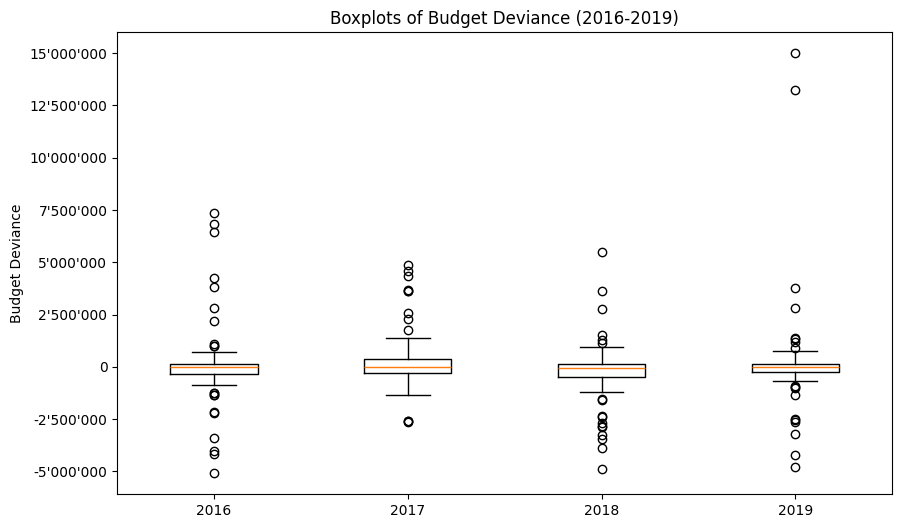

In [30]:
# Function to format the axis labels
def format_axis_labels(value, tick_number):
    return f"{int(value):,}".replace(",", "'")

# Creating the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([merged_df['Abweichung 2016'], merged_df['Abweichung 2017'], 
             merged_df['Abweichung 2018'], merged_df['Abweichung 2019']],
            labels=['2016', '2017', '2018', '2019'])

# Setting custom y-axis formatter
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_axis_labels))

plt.title('Boxplots of Budget Deviance (2016-2019)')
plt.ylabel('Budget Deviance')
plt.show()

In [31]:
# Set pandas display option to suppress scientific notation
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', "'"))

# Calculate summary statistics
summary_stats = merged_df[['Abweichung 2016', 'Abweichung 2017', 'Abweichung 2018', 'Abweichung 2019']].describe()

# Display the summary statistics table
summary_stats

,Abweichung 2016,Abweichung 2017,Abweichung 2018,Abweichung 2019
count,86.00,86.00,86.00,86.00
mean,69'027.73,209'930.49,-281'483.56,155'595.60
std,1'831'845.21,1'364'774.69,1'379'183.07,2'438'188.27
min,-5'088'536.00,-2'654'214.00,-4'877'438.00,-4'790'282.00
25%,-327'311.75,-306'914.00,-508'932.00,-262'328.25
50%,-28'235.50,-20'707.50,-65'659.50,-12'428.50
75%,144'882.00,388'420.50,122'793.25,153'076.75
max,7'362'787.00,4'865'342.00,5'501'197.00,14'989'604.00


The following kst are especially interesting - as they are max. values

In [32]:
#Check min outlier

# Columns to check
columns_to_check = ['Konto','Abweichung 2016', 'Abweichung 2017', 'Abweichung 2018', 'Abweichung 2019']

# Find the minimum values in each column and identify the overall min
min_values = merged_df[columns_to_check].min()
overall_min_value = min_values.min()

# Find the row index where the overall minimum value occurs
min_row_idx = merged_df[merged_df[columns_to_check] == overall_min_value].any(axis=1).idxmax()

# Print only the specified columns for the row with the lowest value
print("Row with the lowest value across specified columns:")
print(merged_df.loc[min_row_idx, columns_to_check])

Row with the lowest value across specified columns:
0
Konto                    331.00
Abweichung 2016   -5'088'536.00
Abweichung 2017   -2'586'628.00
Abweichung 2018     -732'868.00
Abweichung 2019   13'216'726.00
Name: 23, dtype: float64


In [33]:
#Check max outlier

# Columns to check
columns_to_check = ['Konto','Abweichung 2016', 'Abweichung 2017', 'Abweichung 2018', 'Abweichung 2019']

# Find the maximum values in each column and identify the overall max
max_values = merged_df[columns_to_check].max()
overall_max_value = max_values.max()

# Find the row index where the overall maximum value occurs
max_row_idx = merged_df[merged_df[columns_to_check] == overall_max_value].any(axis=1).idxmax()

# Print only the specified columns for the row with the highest value
print("Row with the highest value across specified columns:")
print(merged_df.loc[max_row_idx, columns_to_check])

Row with the highest value across specified columns:
0
Konto                    330.00
Abweichung 2016     -287'957.00
Abweichung 2017    3'655'820.00
Abweichung 2018      412'926.00
Abweichung 2019   14'989'604.00
Name: 22, dtype: float64


Finding the full cost account description for the account of interest

In [34]:
# Load the DataFrame from the CSV file
kostenstellen_df = pd.read_csv('kostenstellen.csv')
kostenstellen_df.head()


,kst_bisher,kst_neu,abk,kst_bezeichnung,id,nr
0,1.00,NaN,BB,Bürgerschaft und Behörden,3a73602e24f4e9f6bc49d5a7732de09c9be6dba8,1
1,11.00,1'100.00,NaN,Stadtparlament und parlamentarische Kommissionen,337ac5335af5c15cc0b2b32a078dd66b0a992052,3
2,12.00,1'200.00,NaN,Stadtrat,e6ab826cacfdae8944f6f75f7652d127488b49e2,6
3,15.00,1'500.00,NaN,Ombudsstelle,e30e49a0c4dea4bd005a3a1ae7617a80f726c1c1,9
4,19.00,190.00,KOM,Kommunikation,29a496727a625b8082f192147ba9dc52054fbb7d,28


In [35]:
# Number to check
number_to_check = 268  # Replace with the number you're looking for

# Check if the number is present in either 'kst_bisher' or 'kst_neu'
result_df = kostenstellen_df[(kostenstellen_df['kst_bisher'] == number_to_check) | (kostenstellen_df['kst_neu'] == number_to_check)]

if not result_df.empty:
    # If the number is found, display the rows
    print(result_df)
else:
    # If the number is not found, print a message
    print("this kst does not exist")

    kst_bisher  kst_neu  abk  \
79      268.00 2'602.00  NaN   

                                      kst_bezeichnung  \
79  Abschreibungen auf VV (bestehende Buchwerte bi...   

                                          id   nr  
79  c3807f8d287791e4e156c138e55d1730e234822f  128  
